In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# Model

In [0]:
def mse(h, y):
  squared_error = (y - h) * (y - h)
  
  return squared_error.sum() / (2 * len(y))

In [0]:
class LinearRegression:
  
  def __init__(self, loss):
    self.loss = loss
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def fit(self, X, y, n_iter, lr):
    
    self._W = np.zeros(X.shape[1])
    
    self._cost_history = []
    self._w_history = [self._W]
    
    for i in range(n_iter):
      
      prediction = self.predict(X)
      cost = self.loss(prediction, y)
      
      self._cost_history.append(cost)
      self._gradient_descent_step(X, y, lr)
      
      self._w_history.append(self._W.copy())
      
    return self
  
  def _gradient_descent_step(self, X, y, lr):
    prediction = self.predict(X)
    
    error= prediction - y
    
    gradient = np.dot(x.T, error) / len(X)
    
    self._W -= lr * gradient


# Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [4]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

--2019-10-16 16:12:14--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv’

house_prices_train. 100%[===================>] 449.88K  --.-KB/s    in 0.05s   

2019-10-16 16:12:20 (8.75 MB/s) - ‘house_prices_train.csv’ saved [460676/460676]



In [0]:
df_train = pd.read_csv('house_prices_train.csv')

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Feature Engineering

In [0]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [13]:
x.shape

(1460, 2)

In [14]:
clf = LinearRegression(mse)
clf.fit(x, y, n_iter=2000, lr=0.01)

In [15]:
clf._W

array([180921.19555322,  56294.90199925])

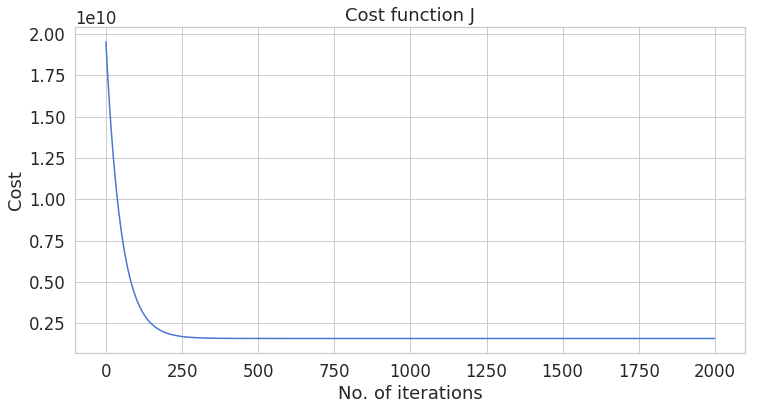

In [16]:
plt.title('Cost function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [17]:
clf._cost_history[-1]

1569921604.8332634

In [19]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y)
line, = ax.plot([], [], lw=2, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = clf._w_history[i][1]*x + clf._w_history[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (clf._cost_history[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=10, blit=True)

rc('animation', html='jshtml')

anim

Output hidden; open in https://colab.research.google.com to view.

# Data exploration

In [20]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

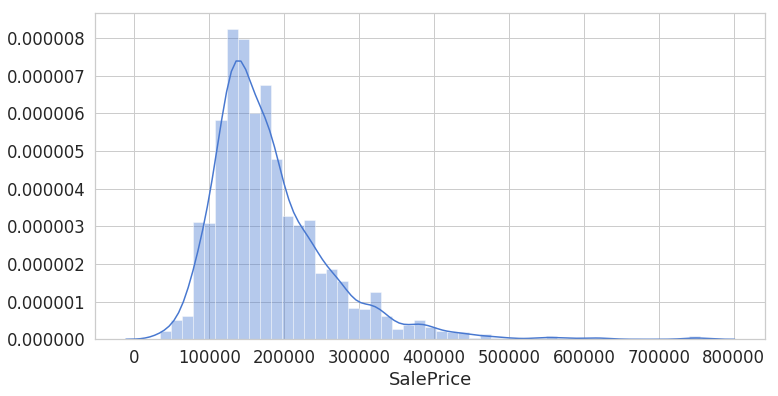

In [21]:
sns.distplot(df_train['SalePrice']);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


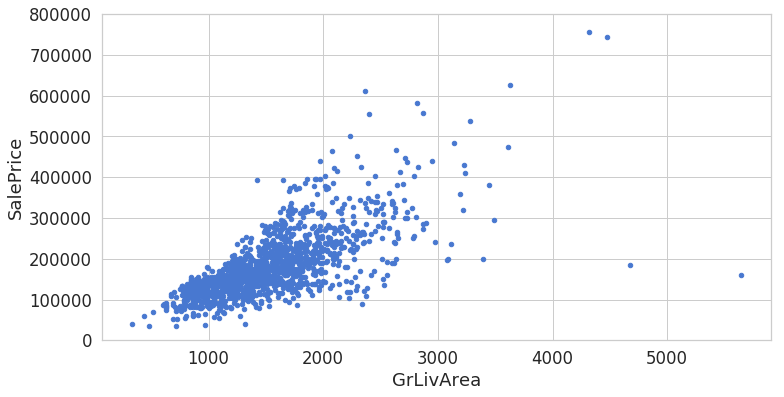

In [22]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


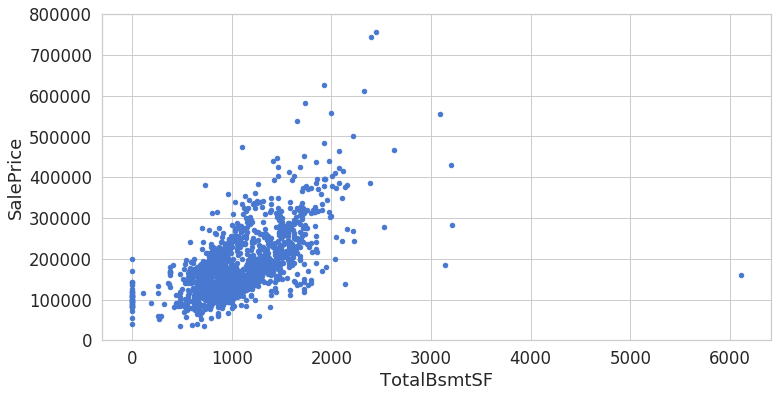

In [23]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

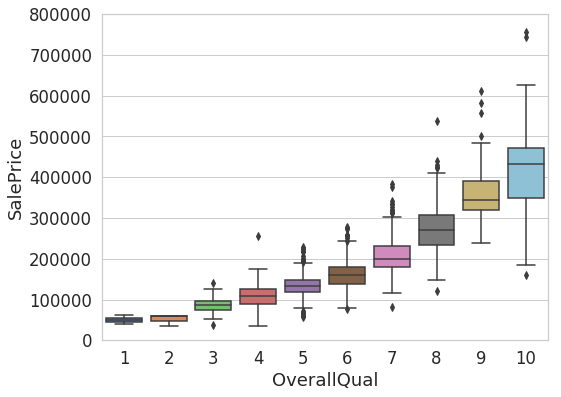

In [24]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

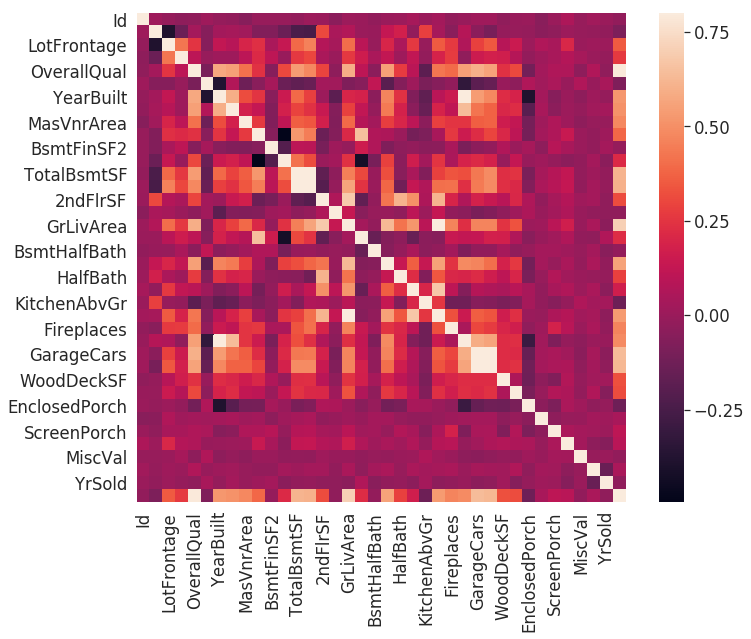

In [25]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

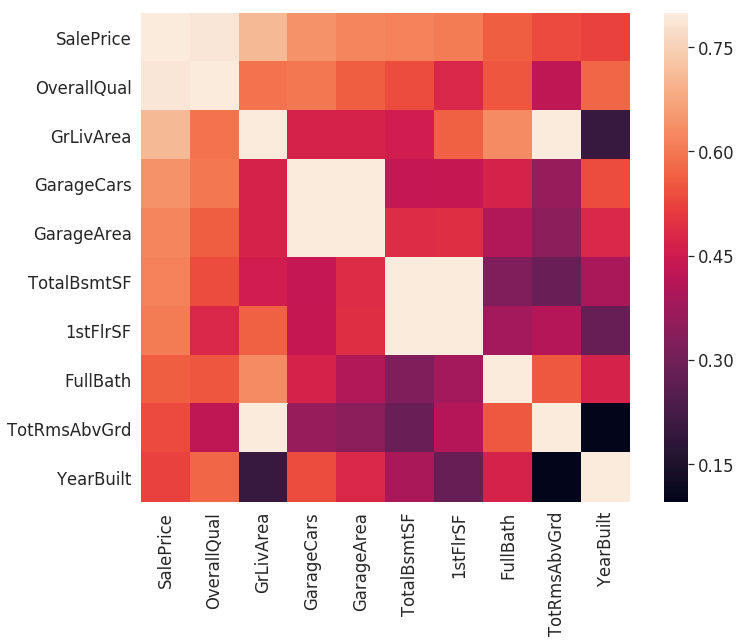

In [26]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


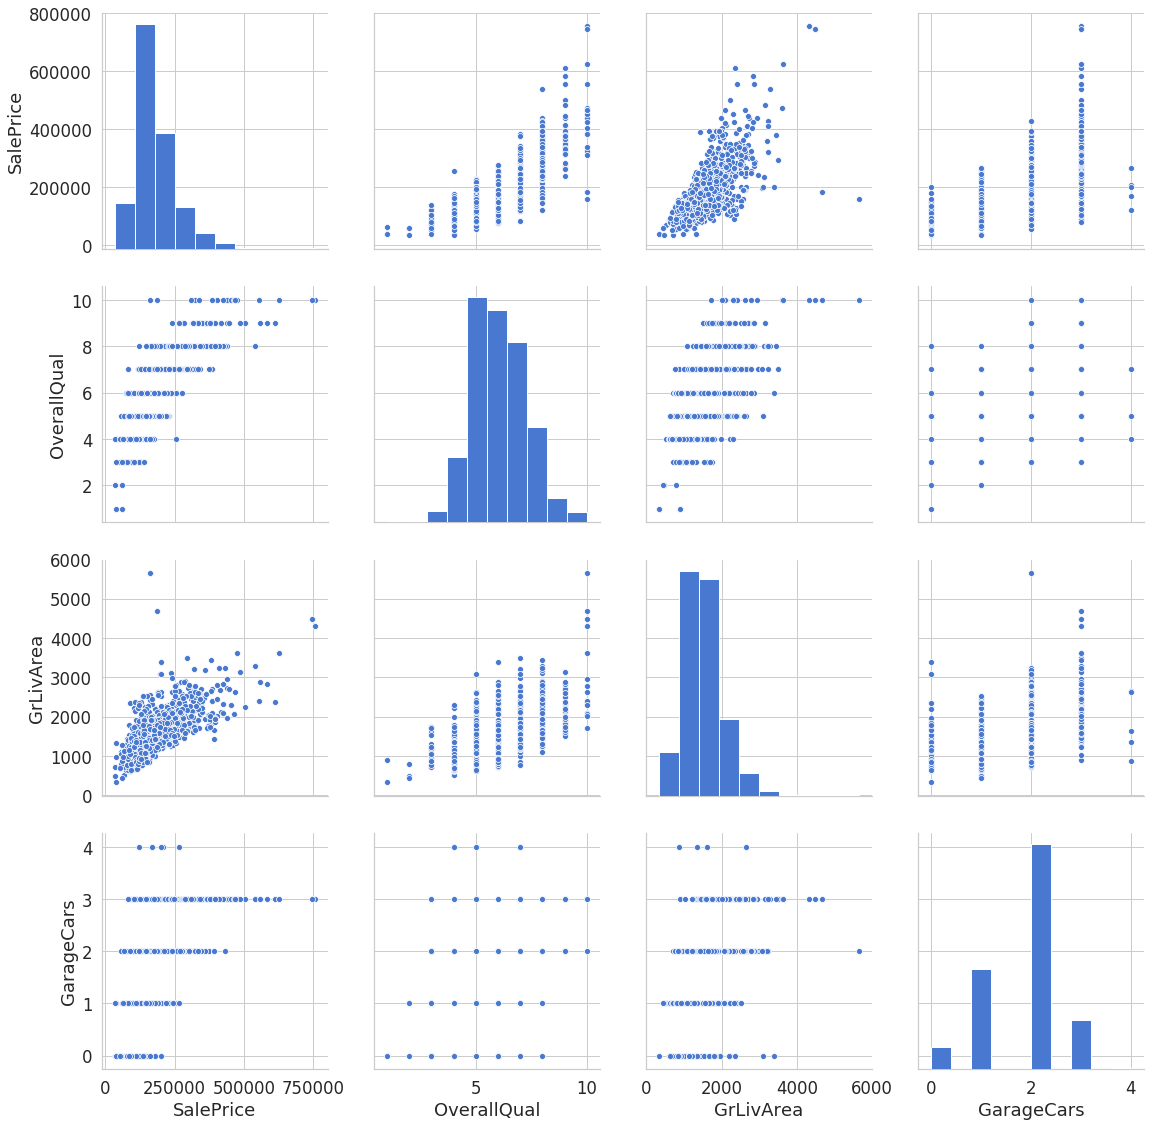

In [27]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);

## Do we have missing data?

In [28]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Multivariable Linear Regression

Let's use more of the available data to build a Multivariable Linear Regression model and see whether or not that will improve our OHMSE error:

In [30]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression(mse)
clf.fit(x, y, n_iter=2000, lr=0.01)

In [31]:
clf._W

array([180921.19555322,  37478.604254  ,  26631.93830568,  15921.22581327])

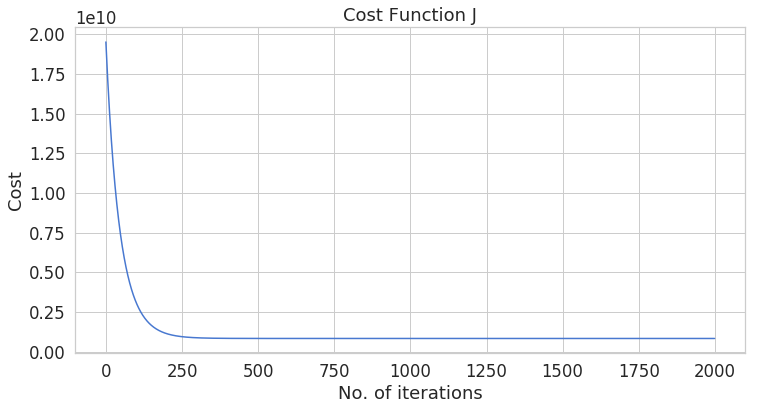

In [32]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [33]:
clf._cost_history[-1]

822817042.8437098